In [97]:
import pandas as pd
import numpy as np

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
import seaborn as sns

In [103]:
df = pd.read_csv('Algerian_forest_fires_mycleaned_dataset.csv')

In [105]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [107]:
df.drop(['day','month','year'],axis=1,inplace = True)

In [109]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [111]:
 df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [113]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [115]:
X = df.drop('FWI',axis=1)
y=df['FWI']

In [117]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [121]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [123]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000


In [125]:
df.columns=df.columns.str.strip()
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

<Axes: >

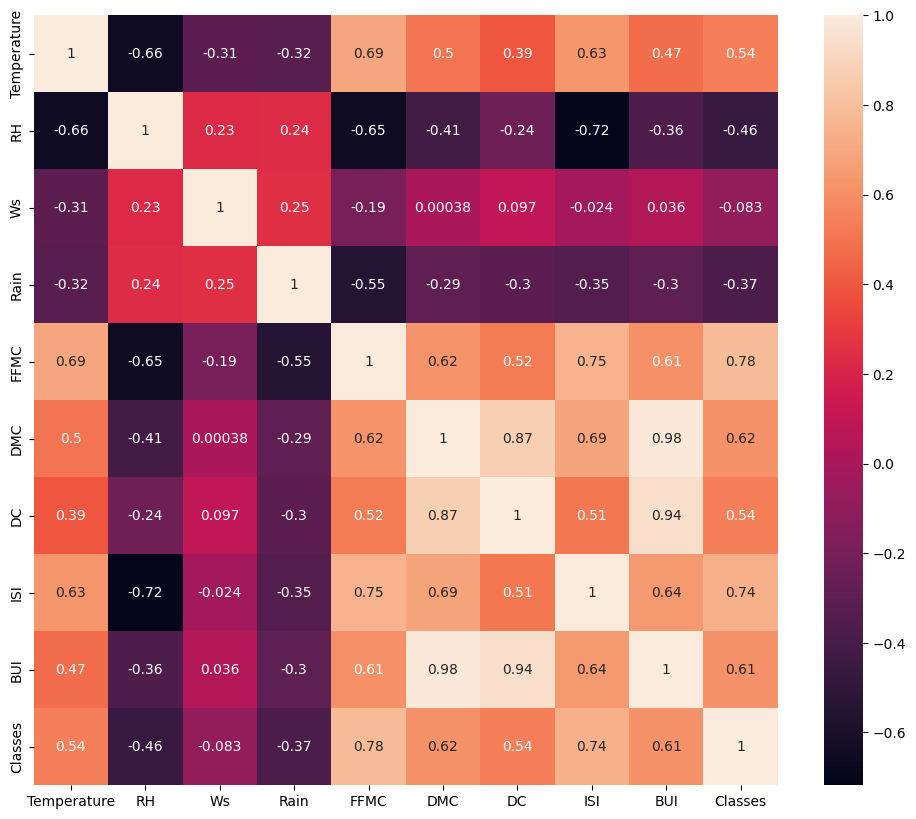

In [127]:
plt.figure(figsize=(12,10))
corr =X_train.corr()
sns.heatmap(corr,annot=True)

so we now need to find that which features are more coreleted and decide the thershold so that if any indepent feature are corellted to certail level then we can remove that feature as they are similar in nature. therhold is decided by domaine expert. 

In [130]:
def correlection(dataset, thershold):
    col_corr = set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thershold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [132]:
corr_features=correlection(X_train,.85)

In [134]:
corr_features

{'BUI', 'DC'}

In [136]:
df = df.reset_index()

In [138]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 8), (61, 8))

In [91]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [152]:
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())
print("Columns to drop (corr_features):", corr_features)

Columns in X_train: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes']
Columns in X_test: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes']
Columns to drop (corr_features): {'DC', 'BUI'}


In [154]:
 X_train = X_train.rename(columns={'old_name_DC': 'DC', 'old_name_BUI': 'BUI'})
X_test = X_test.rename(columns={'old_name_DC': 'DC', 'old_name_BUI': 'BUI'})

In [158]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True,errors='ignore')
X_test.drop(corr_features,axis=1,inplace=True,errors='ignore')
X_train.shape,X_test.shape

((182, 8), (61, 8))

In [160]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
97,29,74,19,0.1,75.8,3.6,2.1,0
141,31,72,14,0.2,60.2,3.8,0.8,0
192,40,31,15,0.0,94.2,22.5,16.6,1
68,32,60,18,0.3,77.1,11.3,2.2,0
119,32,47,14,0.7,77.5,7.1,1.8,0


In [162]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
24,31,64,15,0.0,86.7,14.2,5.7,1
6,33,54,13,0.0,88.2,9.9,6.4,1
152,28,58,18,2.2,63.7,3.2,1.2,0
232,34,58,13,0.2,79.5,18.7,2.1,0
238,30,65,14,0.0,85.4,16.0,4.5,1


In [164]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [166]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.88272888,
        -0.62963326, -1.10431526],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.86687565,
        -0.93058524, -1.10431526],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.61540157,
         2.7271388 ,  0.90553851],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06504105,
        -1.06948615, -1.10431526],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.37760309,
         0.5973248 ,  0.90553851],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.01748135,
        -0.86113478, -1.10431526]], shape=(182, 8))

Text(0.5, 1.0, 'X_train After Scaling')

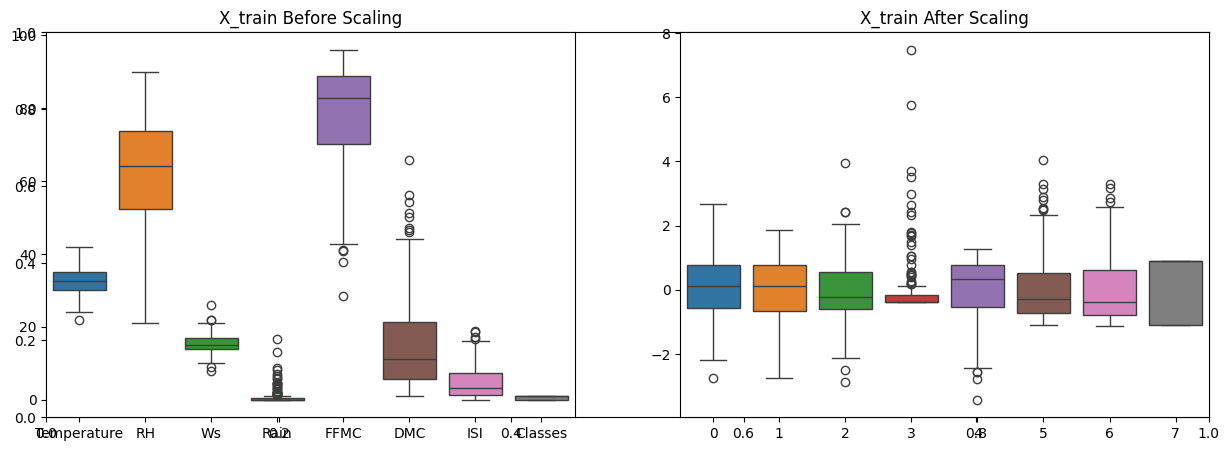

In [176]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [178]:
from sklearn.linear_model import LinearRegression


Mean absolute error 0.5842707645701556
R2 Score 0.9818991727411215


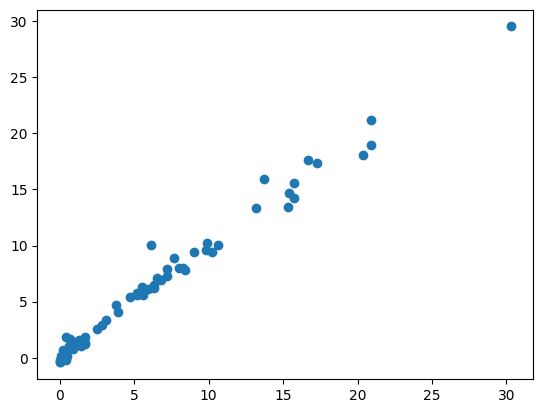

In [186]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


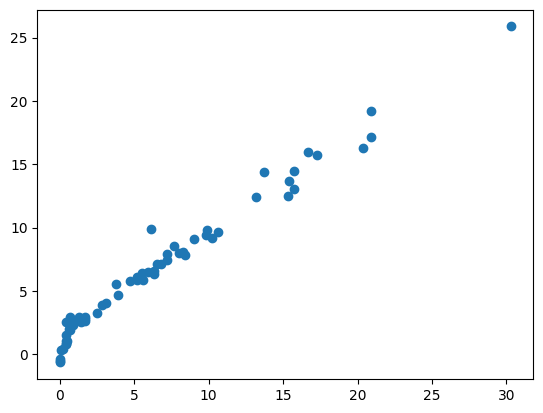

In [188]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [190]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.8264308494715196
R2 Score 0.9710414687002776


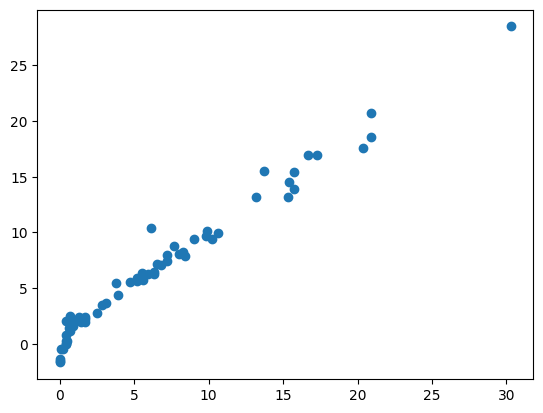

In [192]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.600656123595138
R2 Score 0.9813046839382391


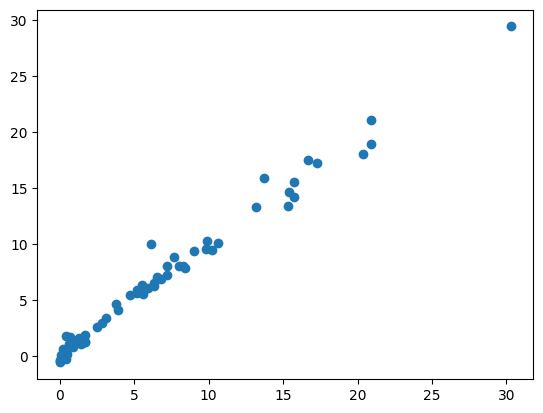

In [194]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.8057412365870257
R2 Score 0.9734404349609262


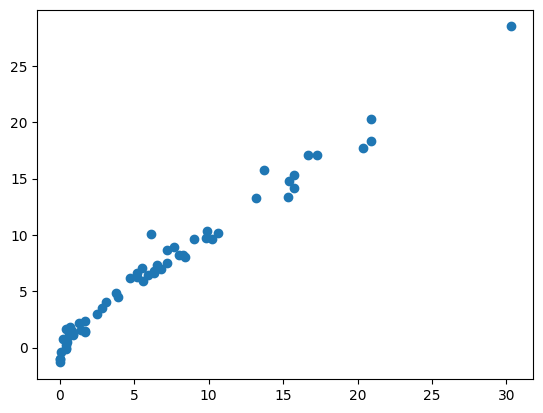

In [196]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


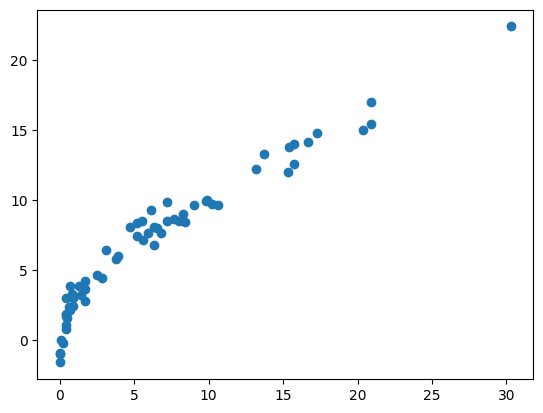

In [198]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7245910057301369
R2 Score 0.9769642275571065


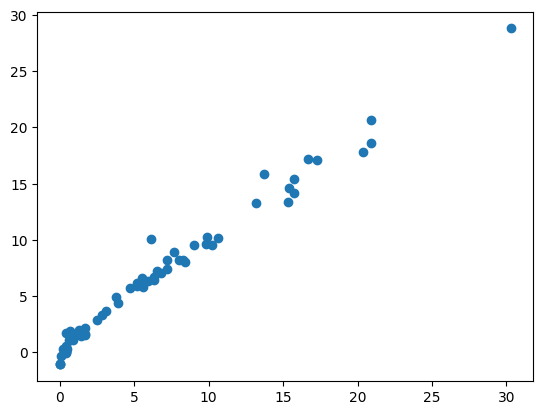

In [200]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [202]:
scaler

StandardScaler()

In [204]:
ridge

Ridge()

In [208]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))